In [102]:
## load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

warnings.filterwarnings('ignore')

In [103]:
## global setting of plot style

sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('Set2')

In [104]:
## load data

houses = pd.read_csv(
    '/Users/charlene/PycharmProjects/DA_Course_QILIU-master/DataSource/DataSource_Melbourne_house/melb_data.csv')

houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


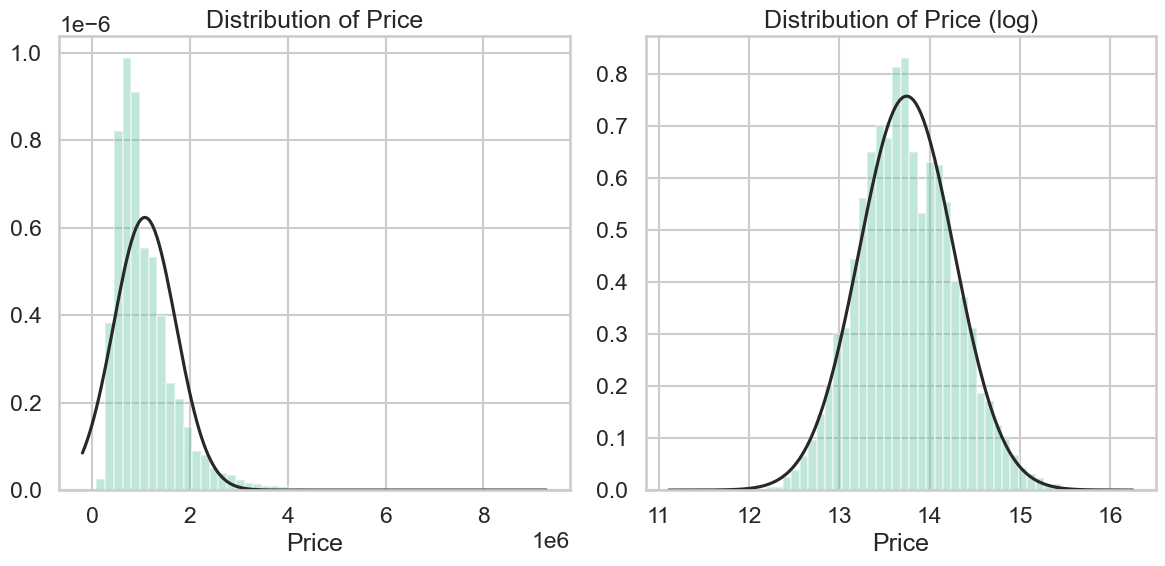

In [105]:
# first, I want to build a subplots which contains the distribution of price and the distribution of price using log

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(houses['Price'], kde=False, ax=ax[0], fit=stats.norm)
sns.distplot(np.log(houses['Price']), kde=False, ax=ax[1], fit=stats.norm)
ax[0].title.set_text('Distribution of Price')
ax[1].title.set_text('Distribution of Price (log)')
plt.tight_layout()
plt.show()

In [106]:
# 我知道了房价的分布为偏右态分布，因此我现在需要估计均值（以中值代替均值）和标准差，并且根据标准差来确定价格的正常范围，以便于后续的数据分析

mu = houses['Price'].median()
sigma = houses['Price'].std()
print('mu = ', mu)
print('sigma = ', sigma)

mu =  903000.0
sigma =  639310.7242960194


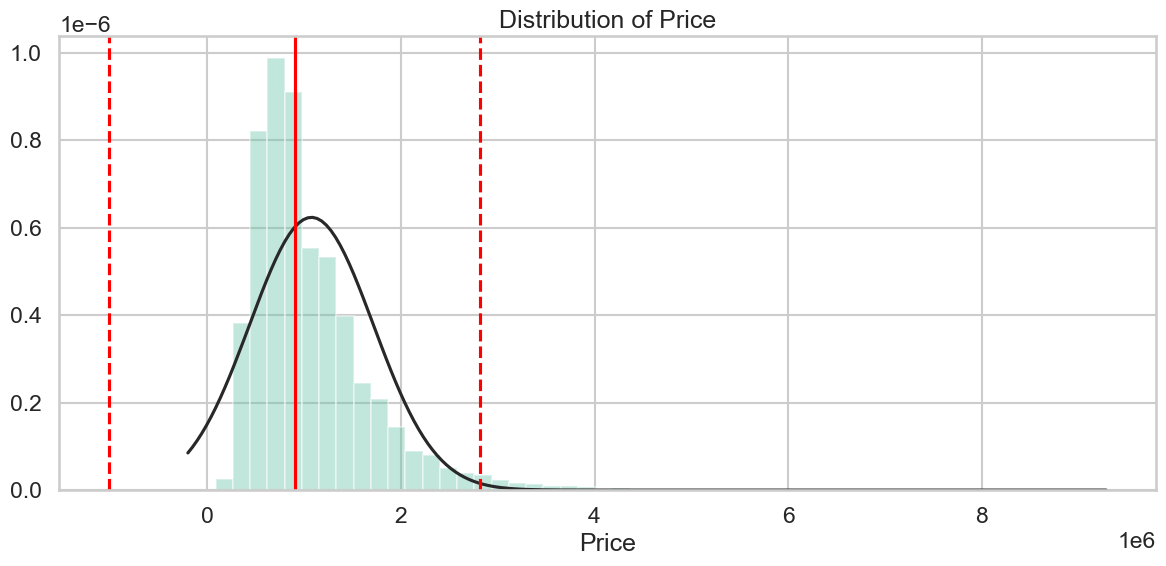

In [107]:
# 通过均值和标准差，我们可以计算出房价的正常范围为（mu-3*sigma, mu+3*sigma），因此我们可以将房价的分布绘制出来

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.distplot(houses['Price'], kde=False, ax=ax, fit=stats.norm)
ax.axvline(mu - 3 * sigma, color='r', linestyle='--')
ax.axvline(mu + 3 * sigma, color='r', linestyle='--')
ax.axvline(mu, color='r', linestyle='-')
ax.title.set_text('Distribution of Price')
plt.tight_layout()
plt.show()

In [108]:
# 我们可以看到，按照这样的规则划分房价的正常范围的话，那么房价的分布中有一些异常值，因此我们需要将异常值去除掉

houses = houses[(houses['Price'] > mu - 3 * sigma) & (houses['Price'] < mu + 3 * sigma)]

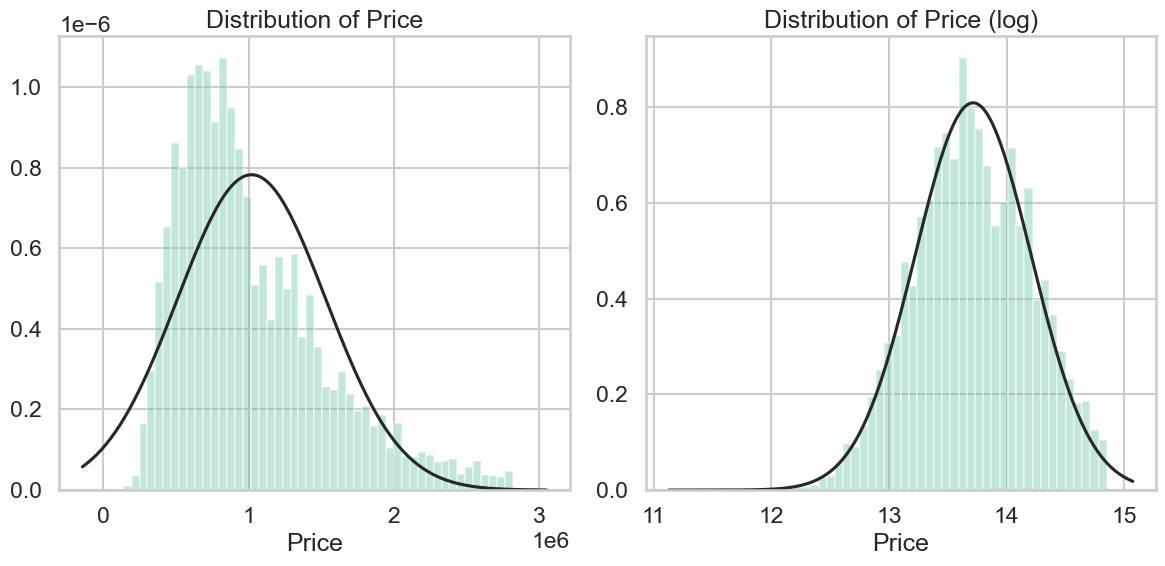

In [109]:
# 我们可以看到，去除掉异常值之后，房价的分布变得更加正态分布，因此我们可以继续进行后续的数据分析

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(houses['Price'], kde=False, ax=ax[0], fit=stats.norm)
sns.distplot(np.log(houses['Price']), kde=False, ax=ax[1], fit=stats.norm)
ax[0].title.set_text('Distribution of Price')
ax[1].title.set_text('Distribution of Price (log)')
plt.tight_layout()
plt.show()

In [110]:
houses.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [111]:
# 选择一些列作为相关性分析的列，我认为有两种途径去进行相关性分析，其一是房价和其所在区域的相关性，其二是房价和房子的特征的相关性，因此我将这两种途径分别进行分析，首先是房价和其所在区域的相关性。代表区域的列有Suburb、Address、Postcode、Regionname、CouncilArea、Lattitude、Longtitude，因此我将这些列作为房价与区域相关性分析的列

In [112]:
# 过于具体的地址信息对于房价的影响不大，因此我将 Addres、Postcode、Lattitude、Longtitude 这些列去除掉

houses = houses.drop(['Address', 'Postcode', 'Lattitude', 'Longtitude'], axis=1)

In [113]:
# 查看 price 与 Suburb、Regionname、CouncilArea 的相关性，因为这三列都是类别型的数据，因此我需要将这三列进行编码，这里我使用的是 LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
houses['Regionname_code'] = le.fit_transform(houses['Regionname'])
houses['CouncilArea_code'] = le.fit_transform(houses['CouncilArea'])
houses['Suburb_code'] = le.fit_transform(houses['Suburb'])

In [114]:
# 查看 price 与 Suburb、Regionname、CouncilArea 的相关性（使用 Suburb_code、Regionname_code、CouncilArea_code），并对结果进行排序

houses[['Price', 'Suburb_code', 'Regionname_code', 'CouncilArea_code']].corr().sort_values(by='Price', ascending=False)

,Price,Suburb_code,Regionname_code,CouncilArea_code
Price,1.000000,-0.135087,0.051888,-0.047066
Regionname_code,0.051888,-0.006305,1.000000,-0.088120
CouncilArea_code,-0.047066,0.025983,-0.088120,1.000000
Suburb_code,-0.135087,1.000000,-0.006305,0.025983


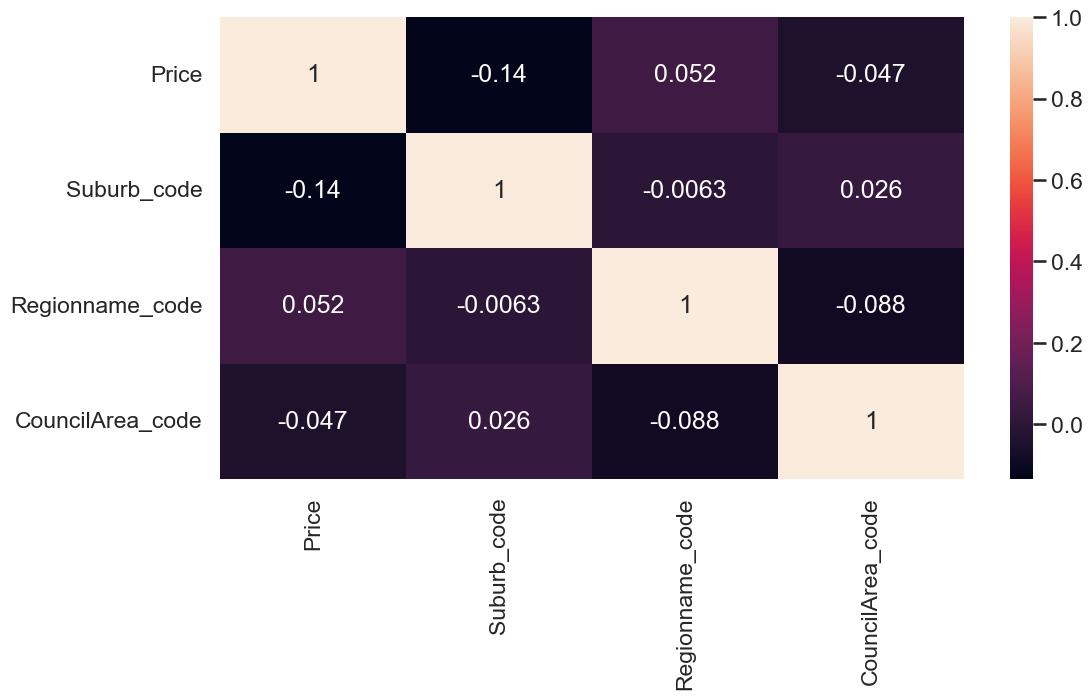

In [115]:
# 将上述的相关性分析结果使用热力图可视化，通过结果可以看到，price 与 regionname 的相关性最大，其次是 councilarea，最后是 suburb，因此我们保留这个区域相关性分析的相关性大小结果到字典price_related中

price_related = {'Regionname_code': 0.052, 'CouncilArea_code': -0.047, 'Suburb_code': -0.14}

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(houses[['Price', 'Suburb_code', 'Regionname_code', 'CouncilArea_code']].corr(), annot=True, ax=ax)
plt.show()


In [116]:
houses.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount',
       'Regionname_code', 'CouncilArea_code', 'Suburb_code'],
      dtype='object')

In [117]:
# 接下来，我们来看看房价和房子其他特征的相关性，我们首先看到，房子的 type 对房价是有影响的，因此我们将 type 这一列进行 one-hot 编码，生成三列，分别是 type_house、type_unit、type_townhouse

houses['type_house'] = houses['Type'].apply(lambda x: 1 if x == 'h' else 0)
houses['type_unit'] = houses['Type'].apply(lambda x: 1 if x == 'u' else 0)
houses['type_townhouse'] = houses['Type'].apply(lambda x: 1 if x == 't' else 0)

In [118]:
# 查看 price 与 type_house、type_unit、type_townhouse 的相关性

houses[['Price', 'type_house', 'type_unit', 'type_townhouse']].corr()

,Price,type_house,type_unit,type_townhouse
Price,1.000000,0.433144,-0.442212,-0.054892
type_house,0.433144,1.000000,-0.807299,-0.450011
type_unit,-0.442212,-0.807299,1.000000,-0.163716
type_townhouse,-0.054892,-0.450011,-0.163716,1.000000


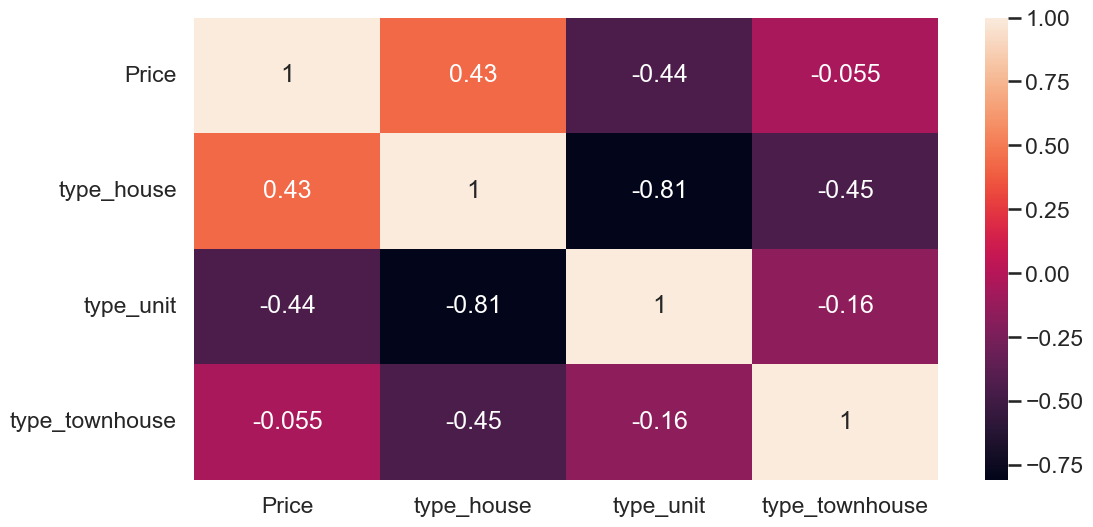

In [119]:
# 将上述的相关性分析结果使用热力图可视化，通过结果可以看到，price 与 type_house 的相关性最大，其次是 type_unit，最后是 type_townhouse，我们将这个结果保存到字典price_related中

price_related['type_house'] = 0.43
price_related['type_unit'] = -0.44
price_related['type_townhouse'] = -0.055

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(houses[['Price', 'type_house', 'type_unit', 'type_townhouse']].corr(), annot=True, ax=ax)
plt.show()


In [120]:
# 接下来，我们选择房子本身的 features来与 price 进行相关性分析

houses[['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']].corr()

,Price,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Price,1.000000,0.502417,-0.157858,0.480044,0.416775,0.210031,0.041135,0.085673,-0.360799
Rooms,0.502417,1.000000,0.313804,0.943066,0.577521,0.400837,0.024450,0.117663,-0.053903
Distance,-0.157858,0.313804,1.000000,0.314605,0.151246,0.278301,0.025288,0.102268,0.243157
Bedroom2,0.480044,0.943066,0.314605,1.000000,0.569934,0.397230,0.024437,0.115976,-0.043039
Bathroom,0.416775,0.577521,0.151246,0.569934,1.000000,0.305814,0.037105,0.104254,0.180811
Car,0.210031,0.400837,0.278301,0.397230,0.305814,1.000000,0.025631,0.092038,0.118563
Landsize,0.041135,0.024450,0.025288,0.024437,0.037105,0.025631,1.000000,0.500087,0.040775
BuildingArea,0.085673,0.117663,0.102268,0.115976,0.104254,0.092038,0.500087,1.000000,0.026041
YearBuilt,-0.360799,-0.053903,0.243157,-0.043039,0.180811,0.118563,0.040775,0.026041,1.000000


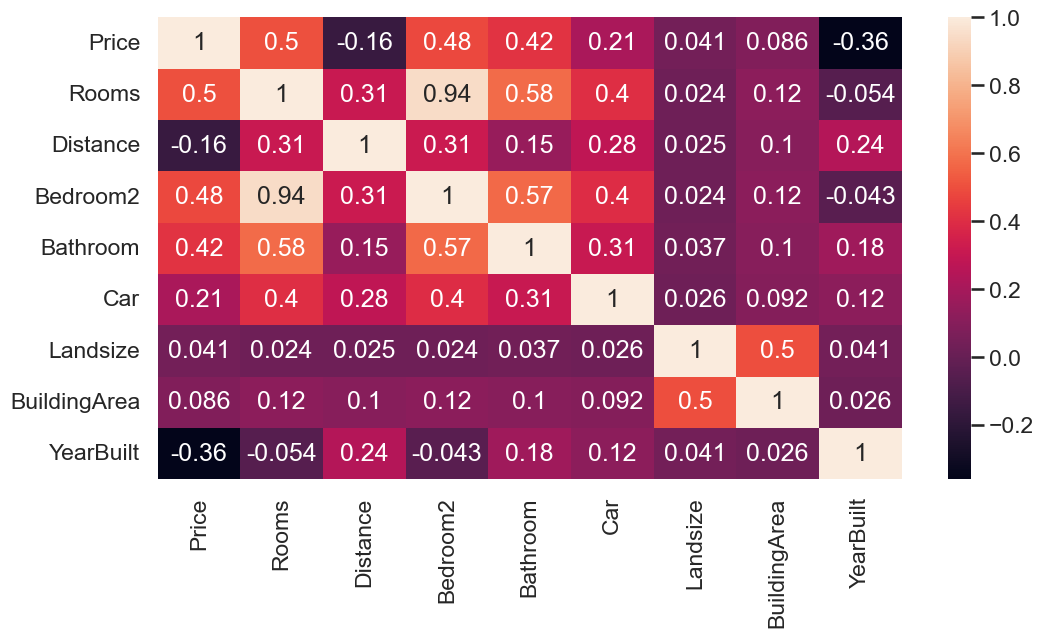

In [121]:
# 将上述的相关性分析结果可视化，并将结果保存到字典price_related中

price_related['Rooms'] = 0.5
price_related['Distance'] = -0.16
price_related['Bedroom2'] = 0.48
price_related['Bathroom'] = 0.42
price_related['Car'] = 0.21
price_related['Landsize'] = 0.041
price_related['BuildingArea'] = 0.086
price_related['YearBuilt'] = -0.36

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(houses[['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']].corr(), annot=True, ax=ax)
plt.show()


In [122]:
# 对剩余的 features 进行相关性分析，他们包括了 Method、SellerG、Propertycount，对这些列中非数值型列进行 label encoding，然后再进行相关性分析

le = LabelEncoder()
houses['Method'] = le.fit_transform(houses['Method'])
houses['SellerG'] = le.fit_transform(houses['SellerG'])

houses[['Price', 'Method', 'SellerG', 'Propertycount']].corr()


,Price,Method,SellerG,Propertycount
Price,1.000000,-0.052246,-0.053796,-0.057809
Method,-0.052246,1.000000,-0.005037,-0.034575
SellerG,-0.053796,-0.005037,1.000000,0.061509
Propertycount,-0.057809,-0.034575,0.061509,1.000000


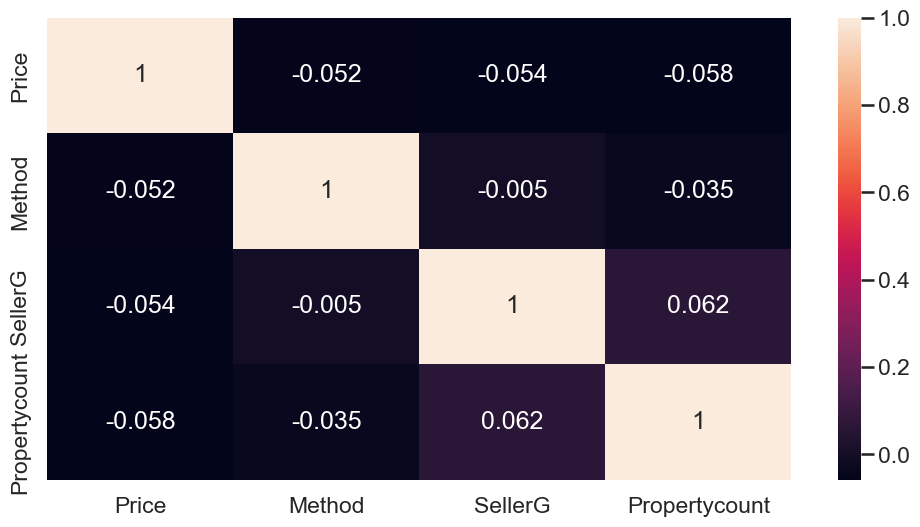

In [123]:
# 将上述的相关性分析结果可视化，并将结果保存到字典price_related中

price_related['Method'] = -0.052
price_related['SellerG'] = -0.054
price_related['Propertycount'] = -0.058

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(houses[['Price', 'Method', 'SellerG', 'Propertycount']].corr(), annot=True, ax=ax)
plt.show()


In [124]:
# 我们对 price_related 进行排序，查看哪些列对房价影响最大

price_related = sorted(price_related.items(), key=lambda x: x[1], reverse=True)
price_related

[('Rooms', 0.5),
 ('Bedroom2', 0.48),
 ('type_house', 0.43),
 ('Bathroom', 0.42),
 ('Car', 0.21),
 ('BuildingArea', 0.086),
 ('Regionname_code', 0.052),
 ('Landsize', 0.041),
 ('CouncilArea_code', -0.047),
 ('Method', -0.052),
 ('SellerG', -0.054),
 ('type_townhouse', -0.055),
 ('Propertycount', -0.058),
 ('Suburb_code', -0.14),
 ('Distance', -0.16),
 ('YearBuilt', -0.36),
 ('type_unit', -0.44)]

In [125]:
# 通过相关性分析，我们发现了影响房价的 features 的重要性。因此，我们选择建立模型，进行预测，并且通过模型来分析哪些列对房价影响最大，是否模型的筛选和人为筛选一致。

In [126]:
# 我们将数据集分为训练集和测试集，训练集用于训练模型，测试集用于评估模型的效果

from sklearn.model_selection import train_test_split
X = houses[[i[0] for i in price_related]]
y = houses['Price']

In [127]:
# 建立模型，我们这里选择回归模型进行预测，他们包括了线性回归模型、随机森林回归模型、决策树回归模型。我们使用 mean_squared_error 来评估模型的效果。

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
RF = RandomForestRegressor()
DT = DecisionTreeRegressor()


In [128]:
# 判断 X 中是否有非数值型列，如果有，则进行 label encoding。并且遍历 X 中的列，填充空值

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
    X[col].fillna(X[col].mean(), inplace=True)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# 训练模型并且进行预测

print('training started...')

LR.fit(X_train, y_train)
print('linear regression completed')

RF.fit(X_train, y_train)
print('random forest completed')

DT.fit(X_train, y_train)
print('decision tree completed')

print('training completed')


training started...
linear regression completed
random forest completed
decision tree completed
training completed


Linear Regression:  125505688473.5407
Random Forest:  48093780167.82963
Decision Tree:  90438366835.32571


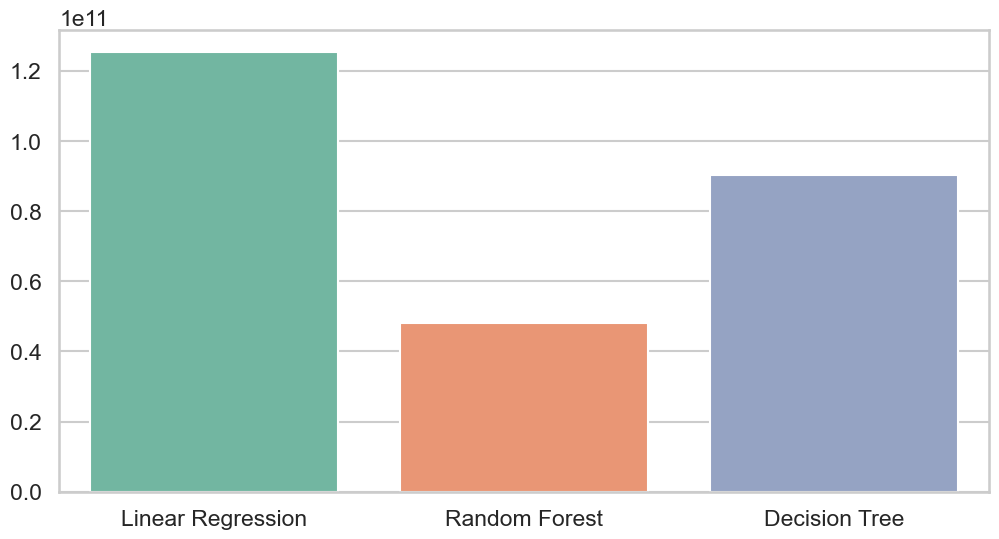

In [132]:
# 评估模型并可视化三种模型的mse，我们发现随机森林回归模型的效果最好，因此我们选择随机森林回归模型进行预测。

LR_pred = LR.predict(X_test)
RF_pred = RF.predict(X_test)
DT_pred = DT.predict(X_test)

LR_mse = mean_squared_error(y_test, LR_pred)
RF_mse = mean_squared_error(y_test, RF_pred)
DT_mse = mean_squared_error(y_test, DT_pred)

print('Linear Regression: ', LR_mse)
print('Random Forest: ', RF_mse)
print('Decision Tree: ', DT_mse)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=['Linear Regression', 'Random Forest', 'Decision Tree'], y=[LR_mse, RF_mse, DT_mse], ax=ax)
plt.show()

In [134]:
# 通过模型的筛选，我们发现了影响房价的 features 的重要性，我们打印出来并且可视化。

import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                  importance
type_unit           0.190162
Distance            0.144431
CouncilArea_code    0.130162
Regionname_code     0.103918
Landsize            0.098698
Rooms               0.089387
BuildingArea        0.050007
Bathroom            0.033283
YearBuilt           0.030022
Propertycount       0.029337
SellerG             0.023278
Suburb_code         0.022116
Bedroom2            0.020562
Car                 0.013284
Method              0.009654
type_house          0.006968
type_townhouse      0.004732


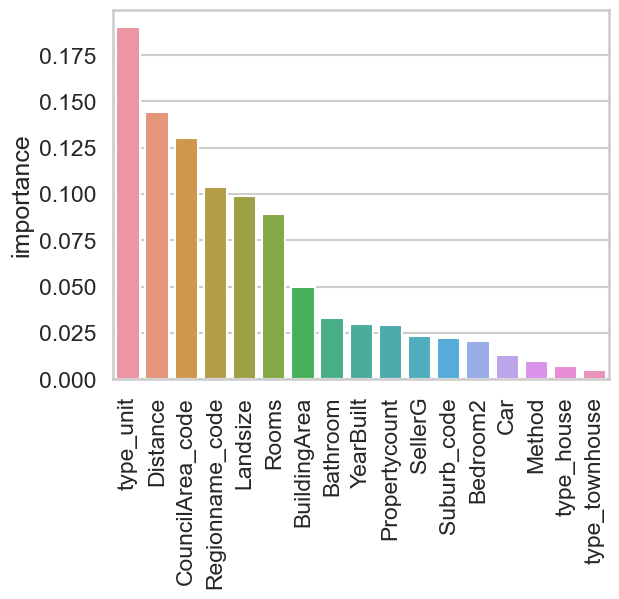

In [135]:
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()

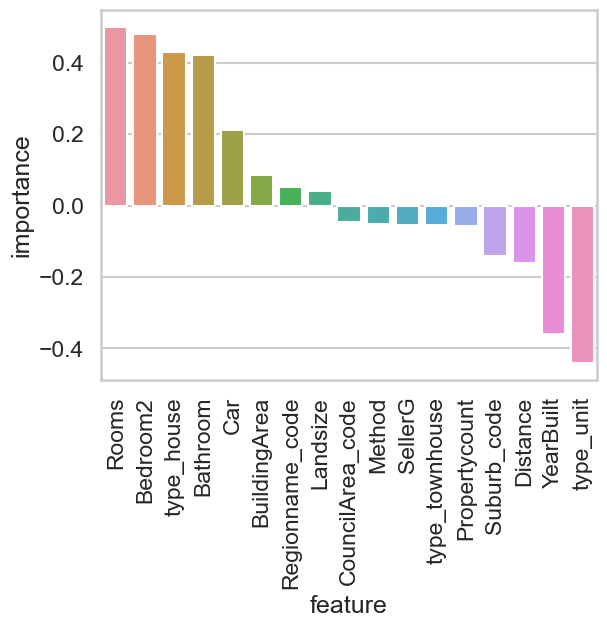

In [137]:
# 我们可视化人为筛选的重要性

price_related = pd.DataFrame(price_related, columns=['feature', 'importance'])
sns.barplot(x=price_related['feature'], y=price_related['importance'])
plt.xticks(rotation=90)
plt.show()


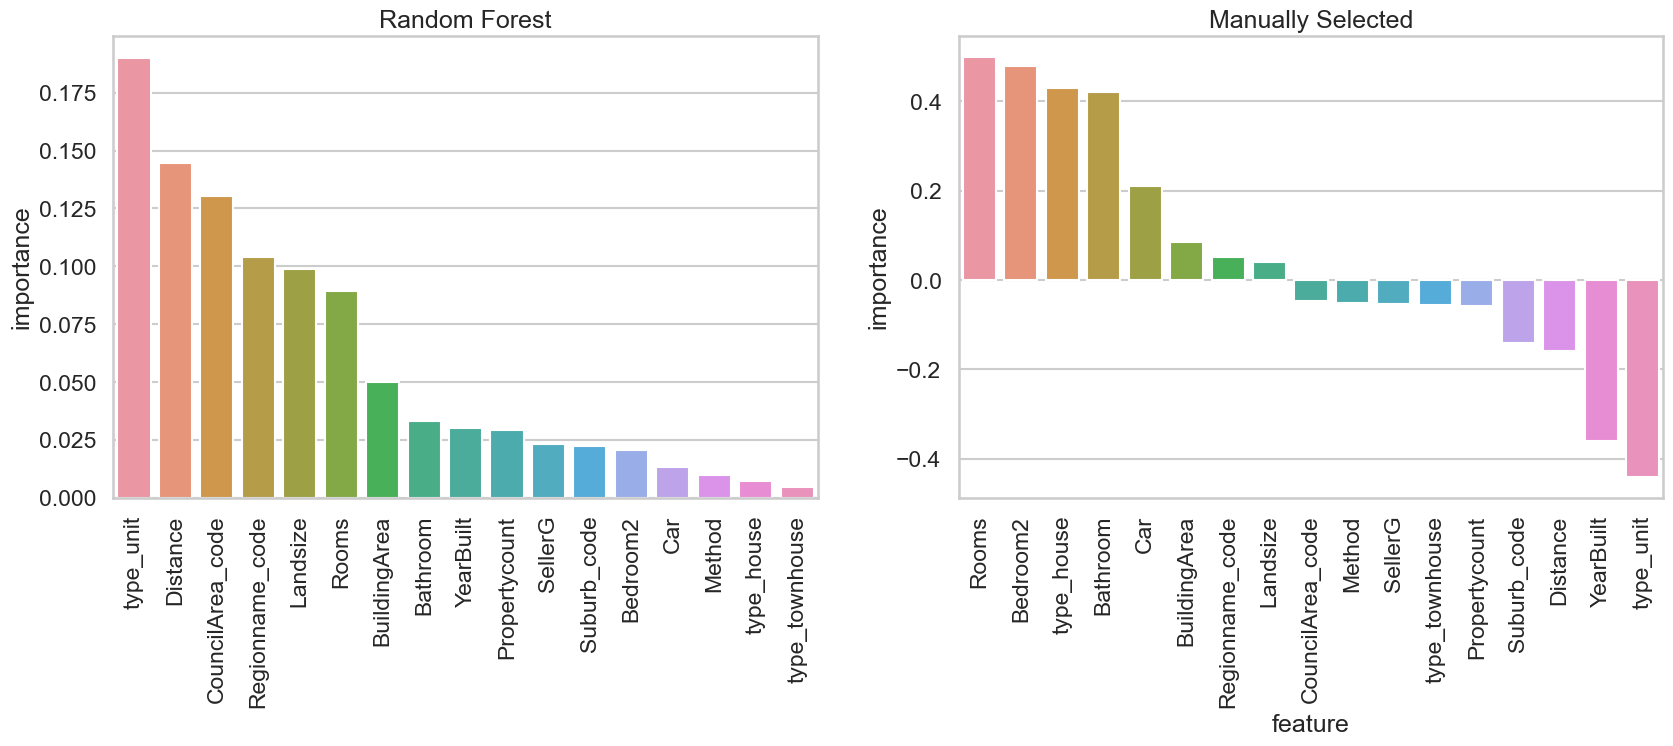

In [138]:
# 我们将两个图放在一起

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], ax=ax[0])
ax[0].set_title('Random Forest')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.barplot(x=price_related['feature'], y=price_related['importance'], ax=ax[1])
ax[1].set_title('Manually Selected')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()


In [139]:
# 我们发现，模型选择的重要性与人为选择的重要性不一致，这是因为模型选择的重要性是通过模型的训练得到的，而人为选择的重要性是通过我们的经验得到的，因此，我们可以将两者结合起来，得到更好的结果。